# 2. Further EDA and Preprocessing

## 2.1 Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import nltk
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# from sklearn.metrics import confusion_matrix
# from sklearn.naive_bayes import MultinomialNB
# from sklearn import metrics
# from matplotlib import cm
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score
# from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_csv('hotel_reviews_structured.csv')

In [4]:
df.head()

,hotel_name,review_summary,score,review
0,Hotel Hilton London Gatwick Airport,Awful...,1,Its hard to find words that can describe this ...
1,Hilton London Metropole,Terrible,1,"Absolutely terrible. Cracked ceiling, tiny roo..."
2,Hilton London Euston,Double deposit taken from bank,1,Very disappointed firstly i checked in online ...
3,Hilton London Metropole,Super disappointed!,1,First of all we arrived wanting to park at the...
4,Hilton London Metropole,Dissatisfied Hilton gold number,1,"Hello, I currently staying @ Hilton Metropole..."


In [5]:
df.shape

(9405, 4)

## 2.2 Checking Frequency of Words and Phrases in Review Summaries

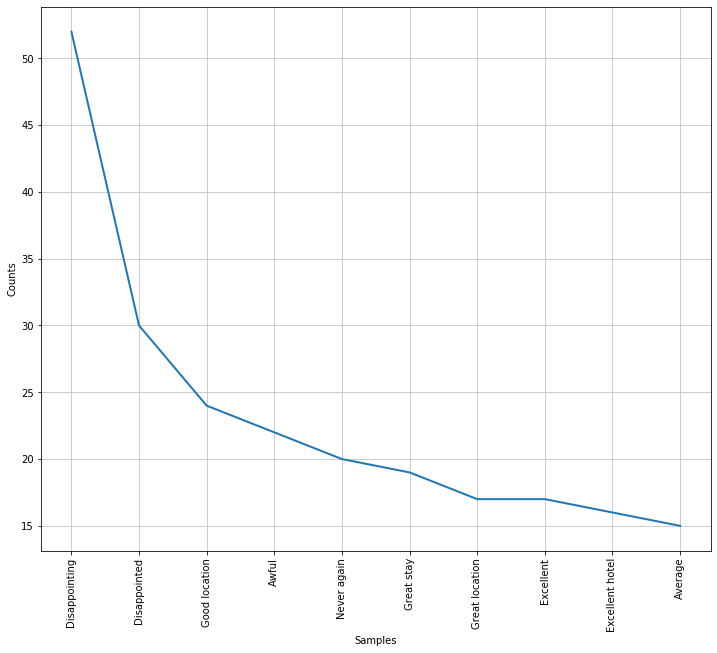

In [6]:
plt.figure(figsize=(12,10))
FreqDist(df['review_summary'].values.tolist()).plot(10)
plt.show()

## 2.3 Flattening Reviews to Check Word Frequency

In [7]:
df['review'][0:3].to_list()

["Its hard to find words that can describe this experience without being too dismissive so i'll keep it short.  Pros. - Check experience was fine.... The checkin clerk was funny and helpful, and had a lovely manner with the guests. Very efficient. - Location... Very well set for access to Gatwick airport, with a short walk to the terminal for your flights.  Cons - Food...  the hotel not only was packed full and the restaurants were full, but the food itself was incredibly poor and expensive.   We did the buffet... on the evening.... barely anything was truly good tasting..... AVOID - Comfort... Hiltons of late seem to be less and less comfortable, the rooms stark... and without any character. Not the cleanest of rooms either. - its a big hotel.... everywhere is a lengthy walk and its just all a bit 'run down'  Poor food, not the best night sleep, expensive for what it is, tired and in need of significant change.  AVOID!",
 'Absolutely terrible. Cracked ceiling, tiny room, bad quality t

In [8]:
flat_list_reviews = []
tokenizer = RegexpTokenizer(r'[a-zA-Z]+') 
tokenized_reviews = tokenizer.tokenize(str(df['review'].values))

for review in tokenized_reviews:
    flat_list_reviews.append(review.lower())

stop_words = stopwords.words("english")

flat_list_reviews = [word for word in flat_list_reviews if word not in stop_words]

## 2.4 Checking Frequency of Words and Phrases in Reviews

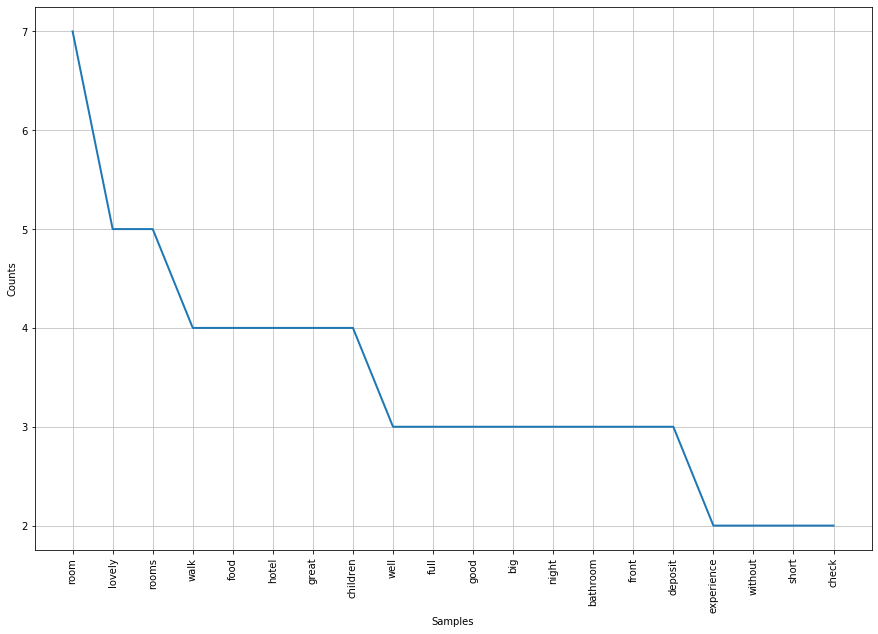

In [9]:
plt.figure(figsize=(15,10))
FreqDist(flat_list_reviews).plot(20)
plt.show()

## 2.5 Stemming and Lemming

In [10]:
stemmer = PorterStemmer()
lemmy = WordNetLemmatizer()

In [11]:
def apply_stem(doc):
    
    doc_split = doc.split(' ')
    stem_doc = ''
    for word in doc_split:
        stem_doc += stemmer.stem(word) + ' '
        
    return stem_doc



def apply_lem(doc):
    
    doc_split = doc.split(' ')
    lem_v_doc = ''
    for word in doc_split:
        lem_v_doc += lemmy.lemmatize(word, pos='v') + ' '
        
    doc_split = lem_v_doc.split(' ')
    lem_doc = ''
    for word in doc_split:
        lem_doc += lemmy.lemmatize(word, pos='a') + ' '
        
    return lem_doc

In [12]:
df['review_stemmed'] = df['review'].apply(apply_stem)
df['review_lemmed'] = df['review'].apply(apply_lem)

df['review_summary_stemmed'] = df['review_summary'].apply(apply_stem)
df['review_summary_lemmed'] = df['review_summary'].apply(apply_lem)

In [13]:
review_index_to_check = 83
print("ORIGINAL REVIEW SUMMARY:",'\n',df['review_summary'].iloc[review_index_to_check],'\n')
print("ORIGINAL REVIEW:",'\n',df['review'].iloc[review_index_to_check],'\n')
print("STEMMED REVIEW SUMMARY:",'\n',df['review_summary_stemmed'].iloc[review_index_to_check],'\n')
print("STEMMED REIVEW:",'\n',df['review_stemmed'].iloc[review_index_to_check],'\n')
print("LEMMED REVIEW SUMMARY:",'\n',df['review_summary_lemmed'].iloc[review_index_to_check],'\n')
print("LEMMED REVIEW:",'\n',df['review_lemmed'].iloc[review_index_to_check],'\n')

ORIGINAL REVIEW SUMMARY: 
 Not recommended 

ORIGINAL REVIEW: 
 We booked at the Hilton for 1 night in December 2019. They gave us a room on the 6th floor (non-smoking floor). The room smelled smoke and ashes were by the windows, when you cannot open the windows. So it means the employees of the hotel smoke in the room while cleaning !!! We went back to the reception and they gave us a refurbished room on the 14th floor. It was nice of them.  Except that the AC/heater make a noise all night and I couldn't sleep !!! So I will not recommend this hotel at all and I will never stay in a Hilton ever ever again !!! 

STEMMED REVIEW SUMMARY: 
 not recommend  

STEMMED REIVEW: 
 We book at the hilton for 1 night in decemb 2019. they gave us a room on the 6th floor (non-smok floor). the room smell smoke and ash were by the windows, when you cannot open the windows. So it mean the employe of the hotel smoke in the room while clean !!! We went back to the recept and they gave us a refurbish room 

In [14]:
df.head()

,hotel_name,review_summary,score,review,review_stemmed,review_lemmed,review_summary_stemmed,review_summary_lemmed
0,Hotel Hilton London Gatwick Airport,Awful...,1,Its hard to find words that can describe this ...,it hard to find word that can describ thi expe...,Its hard to find word that can describe this e...,awful...,Awful...
1,Hilton London Metropole,Terrible,1,"Absolutely terrible. Cracked ceiling, tiny roo...","absolut terrible. crack ceiling, tini room, ba...","Absolutely terrible. Cracked ceiling, tiny roo...",terribl,Terrible
2,Hilton London Euston,Double deposit taken from bank,1,Very disappointed firstly i checked in online ...,veri disappoint firstli i check in onlin but h...,Very disappoint firstly i check in online but ...,doubl deposit taken from bank,Double deposit take from bank
3,Hilton London Metropole,Super disappointed!,1,First of all we arrived wanting to park at the...,first of all we arriv want to park at the hote...,First of all we arrive want to park at the hot...,super disappointed!,Super disappointed!
4,Hilton London Metropole,Dissatisfied Hilton gold number,1,"Hello, I currently staying @ Hilton Metropole...","hello, I current stay @ hilton metropol in lo...","Hello, I currently stay @ Hilton Metropole in...",dissatisfi hilton gold number,Dissatisfied Hilton gold number


## 2.6 Train Test Split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['hotel_name','score']), 
                                                    df['score'], 
                                                    test_size=.2, 
                                                    random_state=42)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7524, 6)
(1881, 6)
(7524,)
(1881,)


## 2.7 TF-IDF Vectorisation for Reviews

In [17]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

tf_idf_vect = TfidfVectorizer(lowercase=True,
                              tokenizer = tokenizer.tokenize, 
                              stop_words=stop_words, 
                              ngram_range=(1,3),
                              min_df = 0.05)
 
x_lemm_train_tfidf_sparse = tf_idf_vect.fit_transform(x_train['review_lemmed'])

x_lemm_test_tfidf_sparse = tf_idf_vect.transform(x_test['review_lemmed'])


x_lemm_train_tfidf = pd.DataFrame(x_lemm_train_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect.get_feature_names())

x_lemm_test_tfidf = pd.DataFrame(x_lemm_test_tfidf_sparse.toarray(), 
                                  columns=tf_idf_vect.get_feature_names())


x_lemm_train_tfidf.head()

,access,air,airport,also,although,always,another,area,around,arrival,...,visit,wait,walk,want,water,way,well,wifi,work,would
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.295793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.19097
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.319942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
4,0.0,0.0,0.146124,0.152727,0.0,0.0,0.191041,0.0,0.0,0.0,...,0.193234,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


## 2.8 TF-IDF Vectorisation for Review Summaries

In [18]:
tokenizer_summary = RegexpTokenizer(r'[a-zA-Z]+')

tf_idf_vect_summary = TfidfVectorizer(lowercase=True, 
                                      tokenizer = tokenizer_summary.tokenize, 
                                      stop_words=stop_words, 
                                      ngram_range=(1,3),
                                      min_df = 0.01)

x_lemm_train_summary_tfidf_sparse = tf_idf_vect_summary.fit_transform(x_train['review_summary_lemmed'])

x_lemm_test_summary_tfidf_sparse = tf_idf_vect_summary.transform(x_test['review_summary_lemmed'])


x_lemm_train_summary_tfidf = pd.DataFrame(x_lemm_train_summary_tfidf_sparse.toarray(), 
                                          columns=tf_idf_vect_summary.get_feature_names())

x_lemm_test_summary_tfidf = pd.DataFrame(x_lemm_test_summary_tfidf_sparse.toarray(), 
                                         columns=tf_idf_vect_summary.get_feature_names())


x_lemm_train_summary_tfidf.head()

,airport,airport hotel,average,awful,bad,bed,best,comfortable,convenient,disappoint,...,staff,standard,start,stay,terminal,terrible,tire,tired,value,worst
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.309871,0.0,0.0,0.0,0.0,0.0,0.0


## 2.9 Joining Reviews With Review Summaries

In [19]:
x_lemm_summary_text = x_lemm_train_summary_tfidf.join(x_lemm_train_tfidf, lsuffix='_sum')
x_lemm_summary_text.head()

,airport_sum,airport hotel,average,awful,bad_sum,bed_sum,best_sum,comfortable_sum,convenient_sum,disappoint,...,visit,wait,walk,want,water,way,well,wifi,work,would
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.295793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.19097
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.319942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.193234,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


In [20]:
# for i, col in enumerate(x_lemm_summary_text.columns):
#     print(i, col)

0 airport_sum
1 airport hotel
2 average
3 awful
4 bad_sum
5 bed_sum
6 best_sum
7 comfortable_sum
8 convenient_sum
9 disappoint
10 disappointing
11 early_sum
12 ever
13 excellent_sum
14 expect_sum
15 experience_sum
16 flight_sum
17 gatwick_sum
18 good_sum
19 good location
20 great_sum
21 great hotel
22 great location
23 hilton_sum
24 holiday_sum
25 hotel_sum
26 location_sum
27 london_sum
28 money_sum
29 need_sum
30 nice_sum
31 night_sum
32 ok_sum
33 one_sum
34 one night_sum
35 overnight
36 overnight stay
37 perfect
38 place_sum
39 poor_sum
40 price_sum
41 room_sum
42 rooms_sum
43 service_sum
44 sleep_sum
45 south_sum
46 south terminal_sum
47 staff_sum
48 standard_sum
49 start_sum
50 stay_sum
51 terminal_sum
52 terrible
53 tire_sum
54 tired
55 value
56 worst
57 access
58 air
59 airport
60 also
61 although
62 always
63 another
64 area
65 around
66 arrival
67 arrive
68 ask
69 away
70 back
71 bad
72 bar
73 bathroom
74 bed
75 best
76 big
77 bite
78 book
79 breakfast
80 buffet
81 business
82 